In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns # for plot visualization
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#import the data file
from google.colab import files
uploaded=files.upload()

Saving Weather.csv to Weather.csv


In [ ]:
weather_df = pd.read_csv('Weather.csv')
weather_df.head()

,created_at,entry_id,field1,field2,field3,field4,latitude,longitude,elevation,status
0,2022-04-12T22:42:35+05:30,361,31.3,71,918.36,0,NaN,NaN,NaN,NaN
1,2022-04-12T22:43:08+05:30,362,31.3,71,979.77,0,NaN,NaN,NaN,NaN
2,2022-04-12T22:43:30+05:30,363,31.3,71,918.29,0,NaN,NaN,NaN,NaN
3,2022-04-12T22:43:52+05:30,364,31.4,71,917.61,0,NaN,NaN,NaN,NaN
4,2022-04-12T22:45:48+05:30,365,31.7,71,918.19,0,NaN,NaN,NaN,NaN


In [ ]:
weather_df.drop('latitude', inplace=True, axis=1)

In [ ]:
weather_df.drop('longitude', inplace=True, axis=1)

In [ ]:
weather_df.drop('elevation', inplace=True, axis=1)

In [ ]:
weather_df.drop('status', inplace=True, axis=1)

In [ ]:
weather_df.head()

,created_at,entry_id,field1,field2,field3,field4
0,2022-04-12T22:42:35+05:30,361,31.3,71,918.36,0
1,2022-04-12T22:43:08+05:30,362,31.3,71,979.77,0
2,2022-04-12T22:43:30+05:30,363,31.3,71,918.29,0
3,2022-04-12T22:43:52+05:30,364,31.4,71,917.61,0
4,2022-04-12T22:45:48+05:30,365,31.7,71,918.19,0


In [ ]:
weather_df = weather_df.rename(columns = {'field1': 'Temperature', 'field2': 'Humidity', 'field3': 'Pressure', 'field4': 'Rain'}, inplace = False)

In [ ]:
weather_df.head()

,created_at,entry_id,Temperature,Humidity,Pressure,Rain
0,2022-04-12T22:42:35+05:30,361,31.3,71,918.36,0
1,2022-04-12T22:43:08+05:30,362,31.3,71,979.77,0
2,2022-04-12T22:43:30+05:30,363,31.3,71,918.29,0
3,2022-04-12T22:43:52+05:30,364,31.4,71,917.61,0
4,2022-04-12T22:45:48+05:30,365,31.7,71,918.19,0


In [ ]:
weather_df.dtypes, weather_df.index.dtype

(created_at      object
 entry_id         int64
 Temperature    float64
 Humidity         int64
 Pressure       float64
 Rain             int64
 dtype: object, dtype('int64'))

In [ ]:
weather_df['created_at'] = weather_df['created_at'].astype('datetime64[ns]')
weather_df.head()

,created_at,entry_id,Temperature,Humidity,Pressure,Rain
0,2022-04-12 17:12:35,361,31.3,71,918.36,0
1,2022-04-12 17:13:08,362,31.3,71,979.77,0
2,2022-04-12 17:13:30,363,31.3,71,918.29,0
3,2022-04-12 17:13:52,364,31.4,71,917.61,0
4,2022-04-12 17:15:48,365,31.7,71,918.19,0


In [ ]:
weather_df.head()

,created_at,entry_id,Temperature,Humidity,Pressure,Rain
0,2022-04-12 17:12:35,361,31.3,71,918.36,0
1,2022-04-12 17:13:08,362,31.3,71,979.77,0
2,2022-04-12 17:13:30,363,31.3,71,918.29,0
3,2022-04-12 17:13:52,364,31.4,71,917.61,0
4,2022-04-12 17:15:48,365,31.7,71,918.19,0


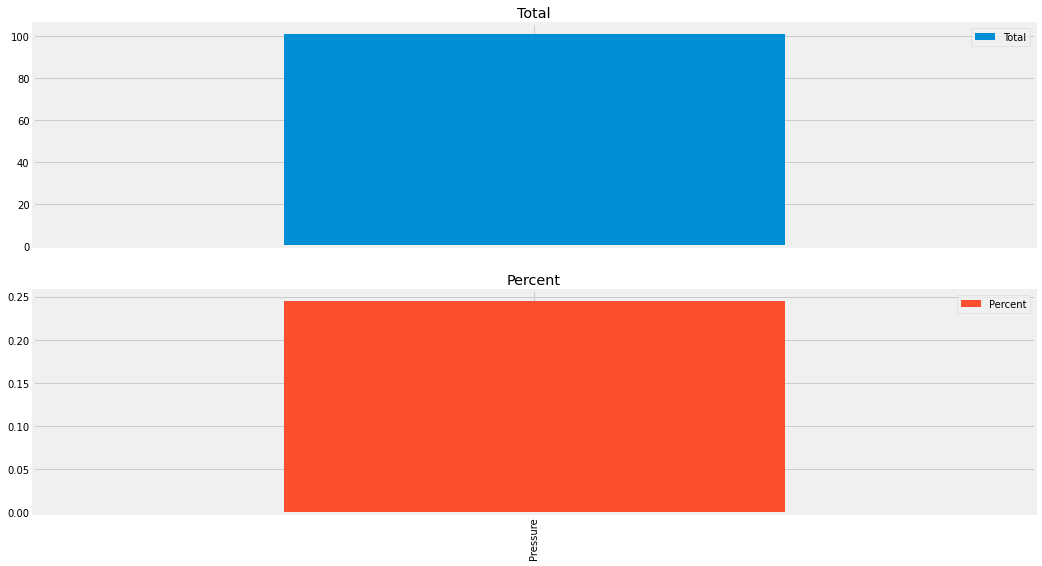

In [ ]:
def list_and_visualize_missing_data(dataset):
    # Listing total null items and its percent with respect to all nulls
    total = dataset.isnull().sum().sort_values(ascending=False)
    percent = ((dataset.isnull().sum())/(dataset.isnull().count())).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    missing_data = missing_data[missing_data.Total > 0]
    
    missing_data.plot.bar(subplots=True, figsize=(16,9))

list_and_visualize_missing_data(weather_df)

In [ ]:
# will fill with previous valid value
weather_df.ffill(inplace=True)
weather_df[weather_df.isnull()].count()

created_at     0
entry_id       0
Temperature    0
Humidity       0
Pressure       0
Rain           0
dtype: int64

In [ ]:
weather_df.describe()

,entry_id,Temperature,Humidity,Pressure,Rain
count,412.000000,412.000000,412.000000,412.000000,412.000000
mean,566.500000,31.333010,72.682039,633.993835,0.148058
std,119.078406,0.418348,1.740701,481.375908,3.005254
min,361.000000,30.200000,71.000000,-177.710000,0.000000
25%,463.750000,30.800000,71.000000,-177.710000,0.000000
50%,566.500000,31.300000,72.000000,918.540000,0.000000
75%,669.250000,31.800000,75.000000,919.712500,0.000000
max,772.000000,31.800000,78.000000,979.770000,61.000000


In [ ]:
weather_df.drop('entry_id', inplace=True, axis=1)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1f9baa6450>,
      dtype=object)

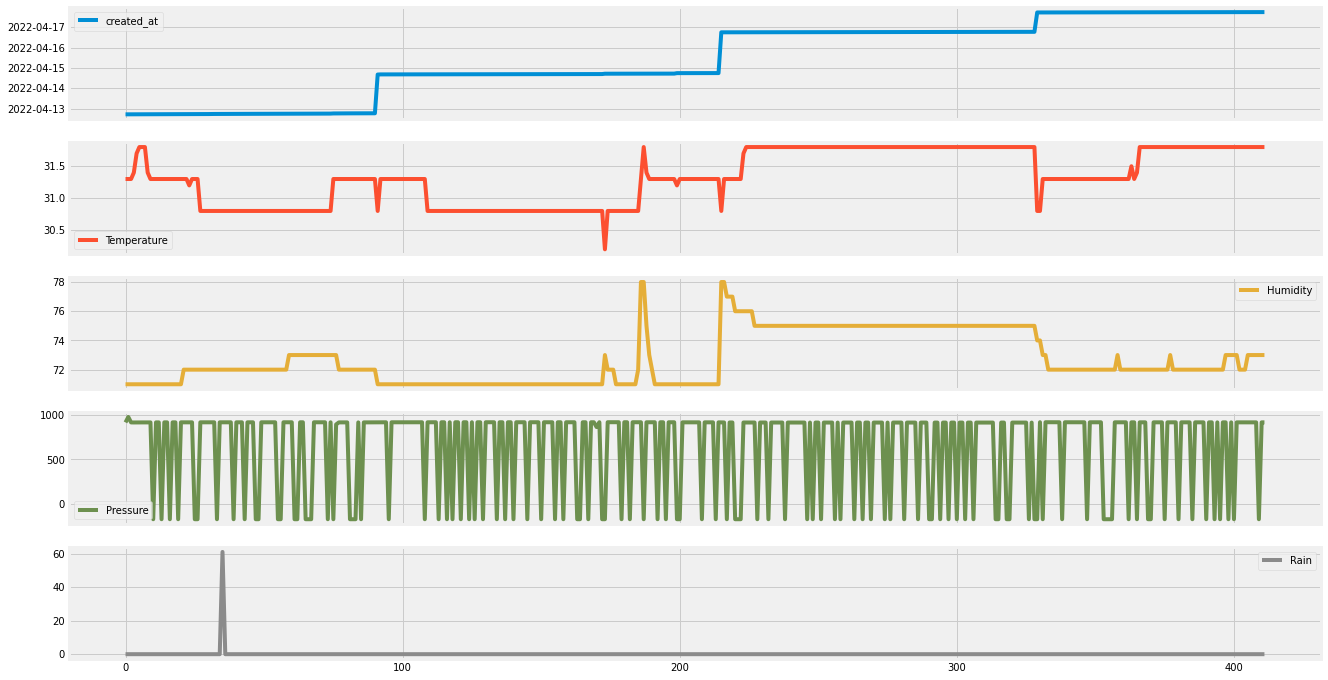

In [ ]:
weather_df.plot(subplots=True, figsize=(20,12))

In [ ]:
weather_df

,created_at,Temperature,Humidity,Pressure,Rain
0,2022-04-12 17:12:35,31.3,71,918.36,0
1,2022-04-12 17:13:08,31.3,71,979.77,0
2,2022-04-12 17:13:30,31.3,71,918.29,0
3,2022-04-12 17:13:52,31.4,71,917.61,0
4,2022-04-12 17:15:48,31.7,71,918.19,0
...,...,...,...,...,...
407,2022-04-17 17:54:01,31.8,73,918.97,0
408,2022-04-17 17:54:18,31.8,73,918.89,0
409,2022-04-17 17:54:34,31.8,73,-177.71,0
410,2022-04-17 17:54:51,31.8,73,918.95,0


In [ ]:
# check rolling mean and rolling standard deviation
def plot_rolling_mean_std(ts):
    rolling_mean = ts.rolling(12).mean()
    rolling_std = ts.rolling(12).std()
    plt.figure(figsize=(22,10))

    plt.plot(ts, label='Actual Mean')
    plt.plot(rolling_mean, label='Rolling Mean')
    plt.plot(rolling_std, label = 'Rolling Std')
    plt.xlabel("Date")
    plt.ylabel("Mean Temperature")
    plt.title('Rolling Mean & Rolling Standard Deviation')
    plt.legend()
    plt.show()

In [ ]:
# Augmented Dickey–Fuller test
def perform_dickey_fuller_test(ts):
    result = adfuller(ts, autolag='AIC')
    print('Test statistic: ' , result[0])
    print('Critical Values:' ,result[4])

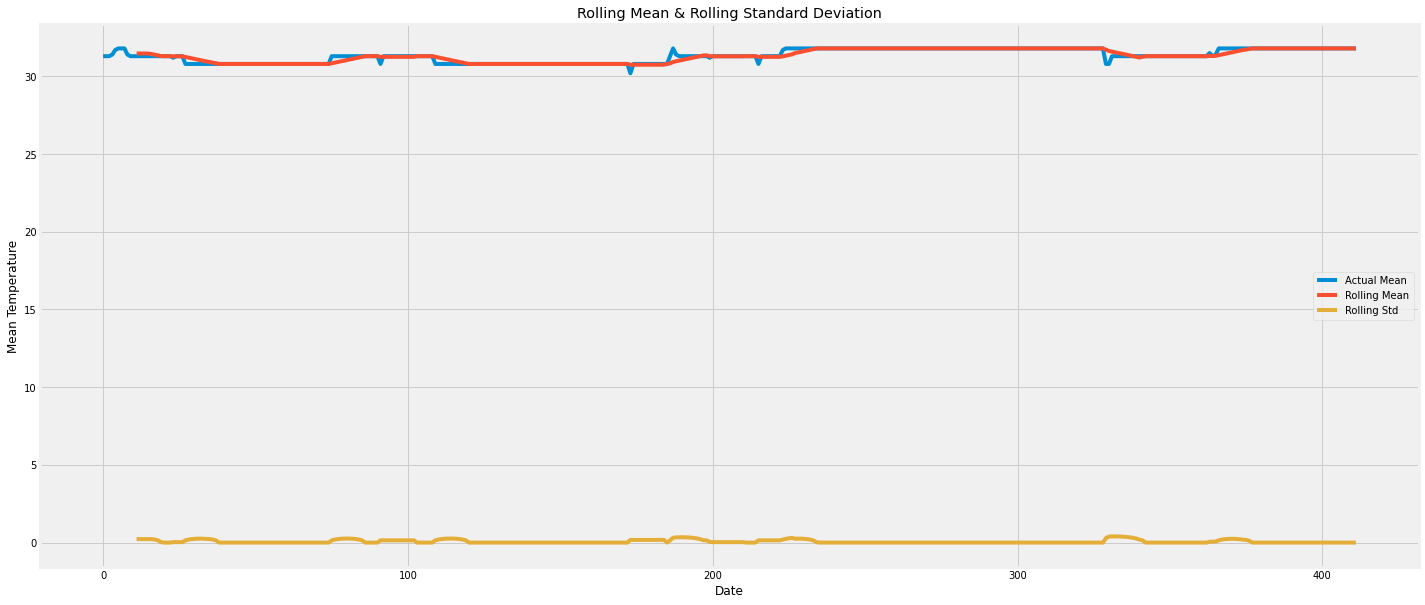

Test statistic:  -1.859340781233549
Critical Values: {'1%': -3.4464400156784927, '5%': -2.868632644097719, '10%': -2.5705481612974577}


In [ ]:
# check stationary: mean, variance(std)and adfuller test
plot_rolling_mean_std(weather_df.Temperature)
perform_dickey_fuller_test(weather_df.Temperature)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


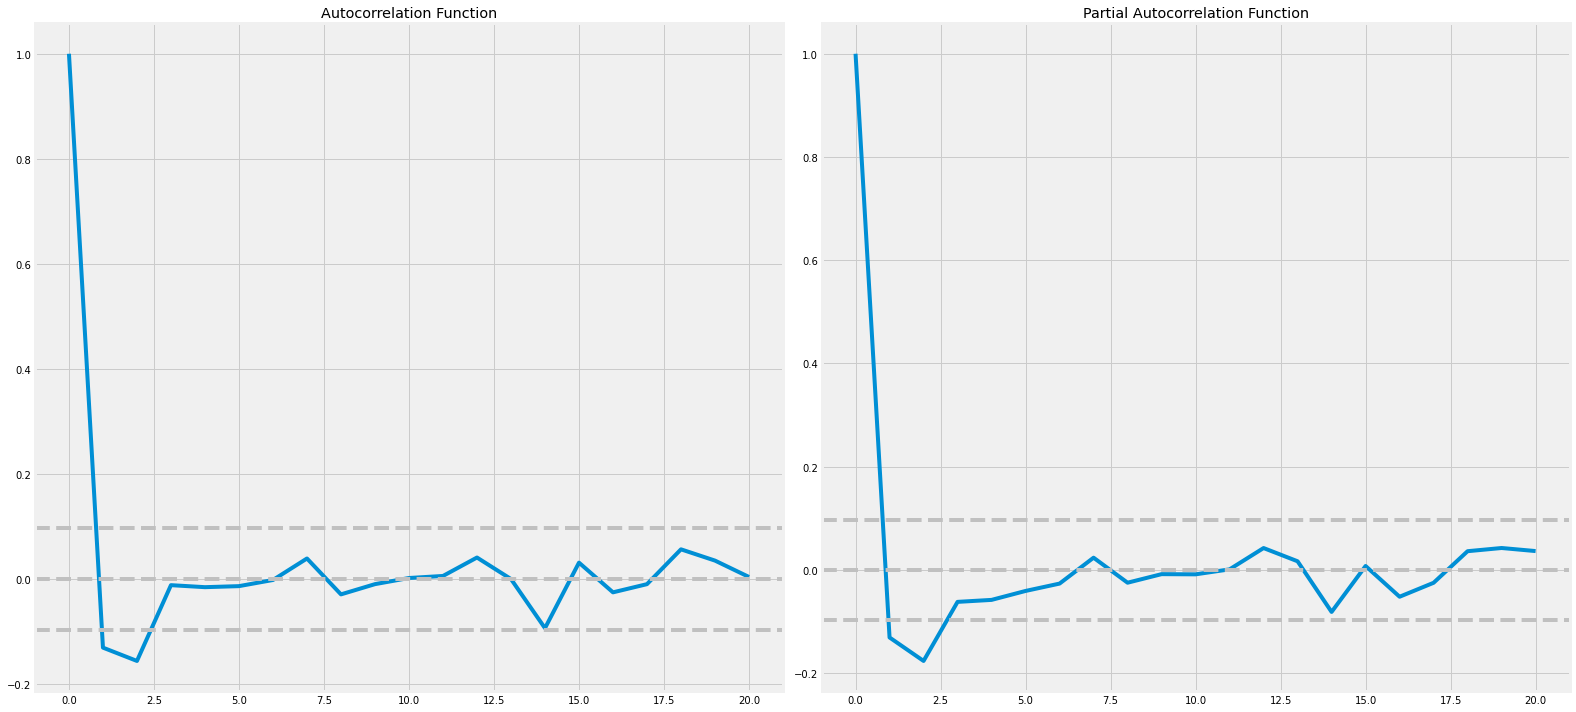

In [ ]:
acf_lag = acf(weather_df['Temperature'].diff().dropna().values, nlags=20)
pacf_lag = pacf(weather_df['Temperature'].diff().dropna().values, nlags=20, method='ols')

plt.figure(figsize=(22,10))

plt.subplot(121)
plt.plot(acf_lag)
plt.axhline(y=0,linestyle='--',color='silver')
plt.axhline(y=-1.96/np.sqrt(len(weather_df['Temperature'].diff().values)),linestyle='--',color='silver')
plt.axhline(y=1.96/np.sqrt(len(weather_df['Temperature'].diff().values)),linestyle='--',color='silver')
plt.title("Autocorrelation Function")

plt.subplot(122)
plt.plot(pacf_lag)
plt.axhline(y=0,linestyle='--',color='silver')
plt.axhline(y=-1.96/np.sqrt(len(weather_df['Temperature'].diff().values)),linestyle='--',color='silver')
plt.axhline(y=1.96/np.sqrt(len(weather_df['Temperature'].diff().values)),linestyle='--',color='silver')
plt.title("Partial Autocorrelation Function")
plt.tight_layout()

p - the point where PACF crosses the upper confiednce level.

q - the point where ACF crosses the upper confiednce level. 

d - number of nonseasonal differences needed for stationarity. 

p = 1

q = 1

d = 0



In [ ]:
model = ARIMA(weather_df['Temperature'].values, order=(1,0,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  412
Model:                     ARMA(1, 1)   Log Likelihood                 325.077
Method:                       css-mle   S.D. of innovations              0.110
Date:                Tue, 19 Apr 2022   AIC                           -642.153
Time:                        07:51:10   BIC                           -626.069
Sample:                             0   HQIC                          -635.791
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.3680      0.166    189.105      0.000      31.043      31.693
ar.L1.y        0.9754      0.011     90.285      0.000       0.954       0.997
ma.L1.y       -0.1785      0.061     -2.911      0.0

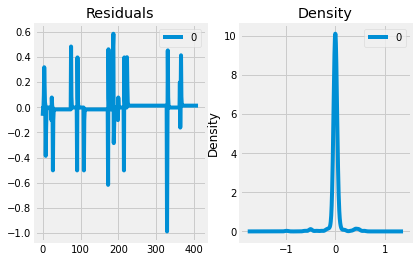

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

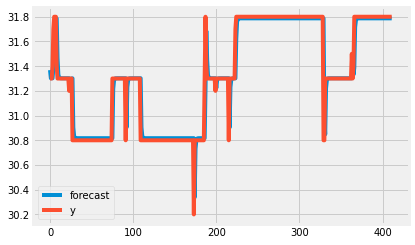

In [ ]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

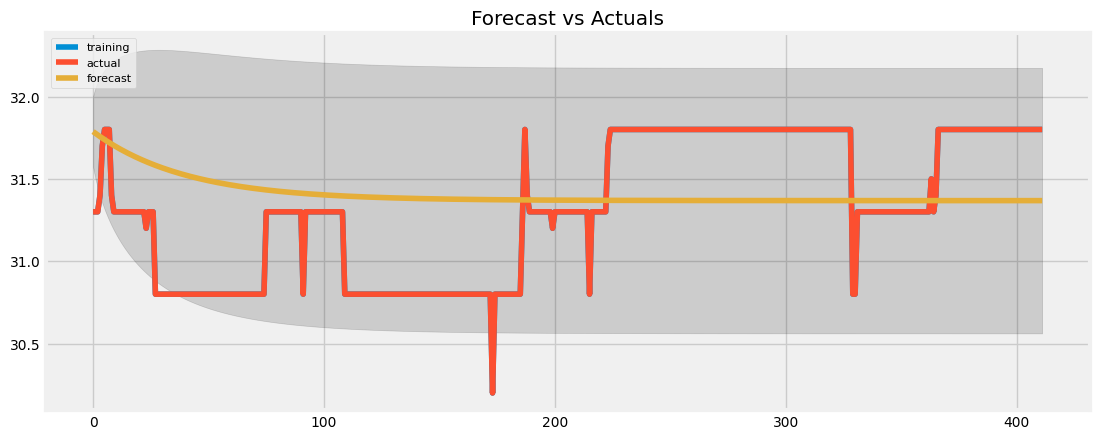

In [ ]:
# # Forecast
fc, se, conf = model_fit.forecast(412, alpha=0.05)  # 95% conf

# print(fc)
# Make as pandas series
fc_series = pd.Series(fc, index=weather_df['Temperature'].index)
lower_series = pd.Series(conf[:, 0], index=weather_df['Temperature'].index)
upper_series = pd.Series(conf[:, 1], index=weather_df['Temperature'].index)

# # Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(weather_df['Temperature'], label='training')
plt.plot(weather_df['Temperature'], label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()